In [2]:
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
seed = 12345

In [6]:
data_creditos = pd.read_csv('loan_prediction.csv')

In [8]:
data_creditos.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [39]:
data_creditos.describe(percentiles=[.9,.925,.95,.975,.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
92.5%,10752.075000,4300.025000,259.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
97.5%,17948.875000,6666.675000,384.500000,363.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

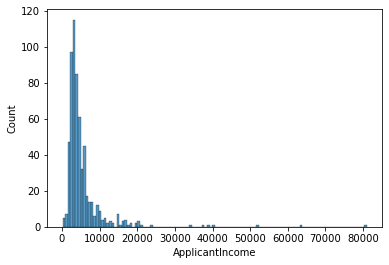

In [41]:
sns.histplot(data= data_creditos, x = 'ApplicantIncome')

In [11]:
data_creditos.shape

(614, 13)

In [12]:
data_creditos.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
porc_nulls = round(data_creditos.isnull().sum() * 100 / data_creditos.shape[0], 2).values
labels = data_creditos.columns.values

In [34]:
len(porc_nulls)

13

In [31]:
import matplotlib.pyplot as plt

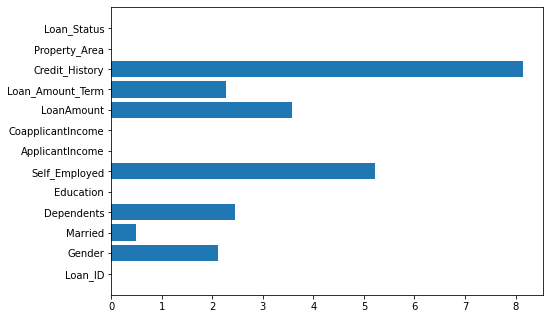

In [38]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = labels
students = porc_nulls
ax.barh(langs,students)
plt.show()

In [23]:
data_creditos.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [42]:
data_creditos.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001778,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [50]:
data_creditos['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [45]:
data_creditos['Loan_Status'] = data_creditos['Loan_Status'].map({'Y':0,'N':1})

In [46]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [52]:
data_creditos['Dependents'] = data_creditos['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})